# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [2]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

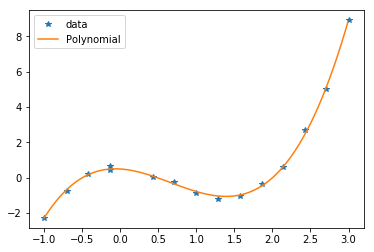

In [11]:
# ... ENTER YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def Fit_NormEq(x, y, m):
    x = np.array(x)
    y = np.array(y)
    n = y.shape[0]
    m += 1
    A = np.ones((n, m))
    for i in range(m):    #формируем design matrix, решаем уравнение на beta
        A[:, i] = x**i
    beta = np.linalg.solve(A.T @ A, A.T @ y)
    return beta

m = 3
params = Fit_NormEq(x, y, m)

def p(x, m, params): #это наш полином
    res = 0
    for i in range(m+1):
        res += params[i] * x**i
    return res

xrange = np.arange(x[0], x[-1], 0.01)
yrange = np.array([p(i, m, params) for i in xrange])   #решил для примера построить для полинома 3 степени

plt.plot(x, y, '*', label='data')
plt.plot(xrange, yrange, '-', label='Polynomial')
plt.legend()
plt.show()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

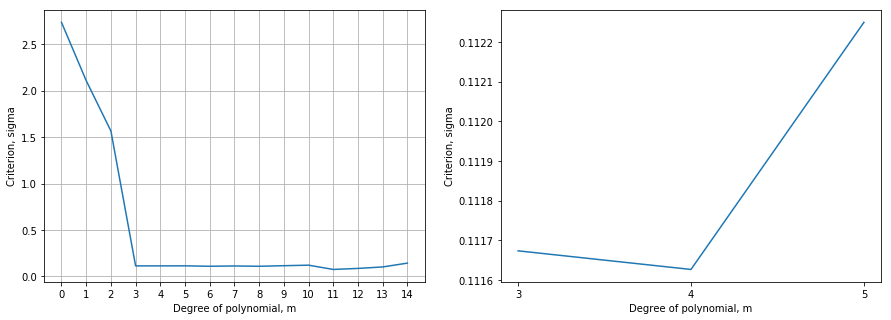

Оптимальные параметры:  [ 0.51184244 -0.33857023 -2.05689291  1.08931365 -0.01872316] , при m = 4


In [15]:
# ... ENTER YOUR CODE HERE ...

def OptimusP(x, y, f):   # функция для набора данных, используя прошлую функцию, ищет искомый критерий
    x = np.array(x)
    y = np.array(y)
    
    n = y.shape[0]
    sigma_sq = np.zeros(n)
    
    for m in range(n):
        beta = Fit_NormEq(x, y, m)
        
        for i in range(n):
            sigma_sq[m] += (f(x[i], m, beta) - y[i])**2
        sigma_sq[m] /= (n - m)
    
    return sigma_sq**0.5

sigma = OptimusP(x, y, p)
mrange = np.arange(3, 6)

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

ax[0].set(xlabel='Degree of polynomial, m', ylabel='Criterion, sigma')    # смотрим на общую картину
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].plot(sigma)
ax[0].grid()

ax[1].set(xlabel='Degree of polynomial, m', ylabel='Criterion, sigma')    # повнимательнее посмотрим на 'подножье'
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].plot(mrange,sigma[3:6])

plt.show()
print('Оптимальные параметры: ', Fit_NormEq(x, y, 4), ', при m = 4')

In [6]:
# Видно, что лучшее, и при этом не большое, m = 4, дальше уже 'слишком много' параметров

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

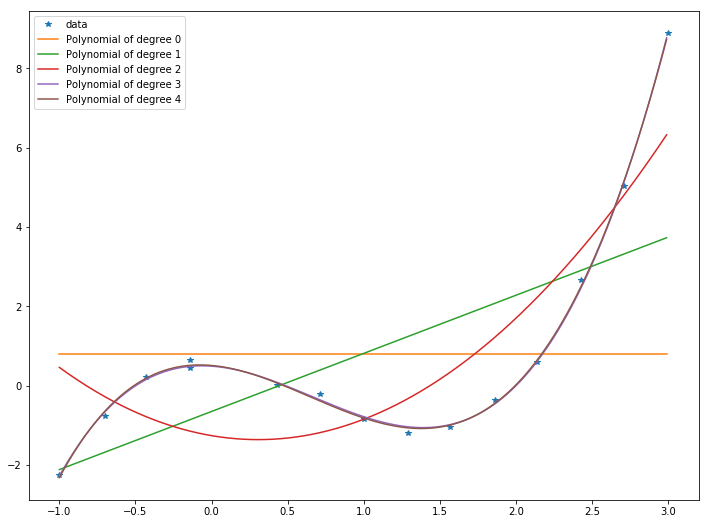

In [21]:
# ... ENTER YOUR CODE HERE

xrange = np.arange(x[0], x[-1], 0.01)
plt.figure(figsize=(12,9))
plt.plot(x, y, '*', label='data')

for m in range(5):   # m=3 и m=4 немного накладываются друг на друга
    beta = Fit_NormEq(x, y, m)
    yrange = np.array([p(i, m, beta) for i in xrange])
    plt.plot(xrange, yrange, '-', label=f'Polynomial of degree {m}')

plt.legend()
plt.show()

In [22]:
# Видно, что m=4 хорошо ложится на данные(как и m=3, но 4 немного лучше)

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

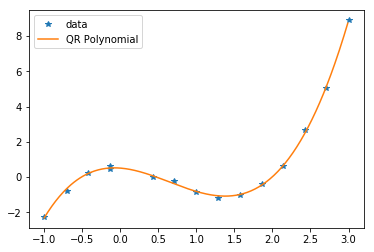

Разность между параметрами в явной реализации системы, и через QR: 
 [-4.77395901e-14  1.12465592e-13  9.23705556e-14 -1.32338585e-13
  3.08746084e-14]


In [24]:
# ... ENTER YOUR CODE HERE ...
from scipy.linalg import qr

def Fit_qr(x, y, m):
    x = np.array(x)
    y = np.array(y)
    n = y.shape[0]
    m += 1
    A = np.ones((n, m))
    for i in range(m):     #формируем design matrix, но воспользуемся для решения уравнения на beta qr-разложением
        A[:, i] = x**i
    Q, R = qr(A)
    f = (Q.T @ y)[:m]
    R_1 = R[:m, :m]
    beta = np.linalg.solve(R_1, f)
    return beta

Beta = Fit_qr(x, y, optimal)

xrange = np.arange(x[0], x[-1], 0.01)
yrange = np.array([p(i, optimal, beta) for i in xrange])

plt.plot(x, y, '*', label='data')
plt.plot(xrange, yrange, '-', label='QR Polynomial')
plt.legend()
plt.show()

print("Разность между параметрами в явной реализации системы, и через QR: \n", Beta - beta)

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

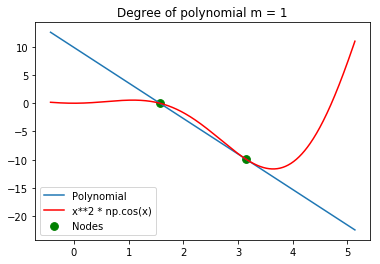

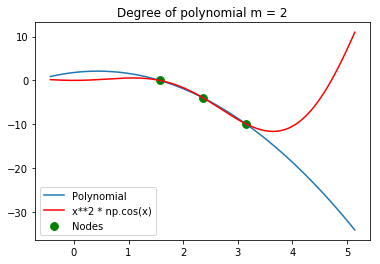

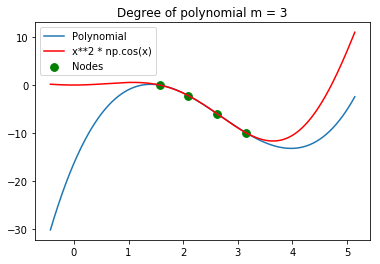

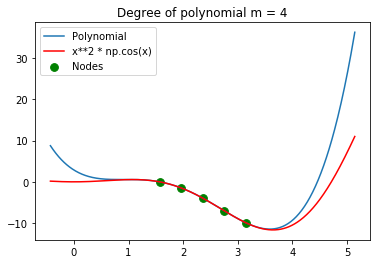

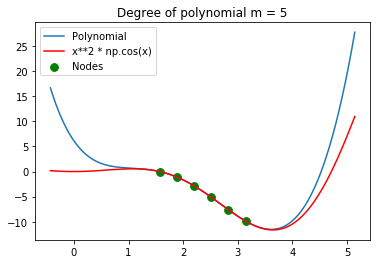

In [25]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return x**2 * np.cos(x)    # наша исходная функция

def Lagr_interp(f, m, func, title='', bounds=[np.pi/2, np.pi], external=True):     # все вводимые параметры вроде понятны, последний отвечает за то, показывать ли график немного слева и справа от границ; можно было еще и впихнуть насколько далеко он будет показывать, но уже не стал
    m += 1
    step = (bounds[1] - bounds[0])/(m-1)
    X_Nodes = np.arange(bounds[0], bounds[1]+step/2, step)    # формируем сетку, Y_Nodes нужны чтобы отметить узлы на графике, и в коэффициентах полинома
    Y_Nodes = np.array([f(k) for k in X_Nodes])
    
    def P(X_Nodes, Y_Nodes, x):      # наш полином, считается по порядку от l_0 До l_m
        result = 0
        N = X_Nodes.shape[0]
        for i in range(N):
            l = 1
            for j in range(N):
                if i != j:
                    l *= (x - X_Nodes[j])/(X_Nodes[i] - X_Nodes[j])           # код постарался написать гибким, чтобы легко подбить под другую функцию и интервал
            result += Y_Nodes[i] * l
        return result
    
    fig, ax = plt.subplots()
    
    if external:
        X = np.arange(bounds[0] - 2, bounds[1] + 2, 1e-2)      # посмотрим как интервал, так и немного за ним поведение полинома(по умолчанию)
    else:
        X = np.arange(bounds[0], bounds[1], 1e-2)
        
    Y = np.array([P(X_Nodes, Y_Nodes, x) for x in X])
    
    ax.plot(X, Y, label='Polynomial')
    ax.scatter(X_Nodes, Y_Nodes, label='Nodes', c='green', s=60)
    
    trueY = np.array([f(x) for x in X])
    ax.plot(X, trueY, c='red', label=func)
    ax.set(title=title)
    ax.legend()
    plt.show()

for i in range(5):
    Lagr_interp(f, i+1, 'x**2 * np.cos(x)', title=f'Degree of polynomial m = {i+1}')

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

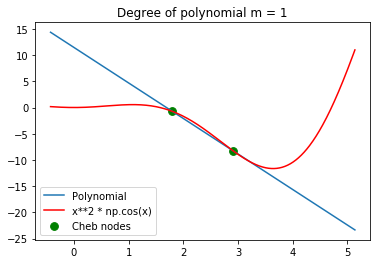

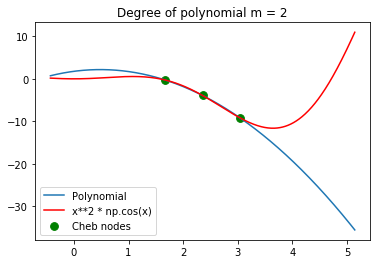

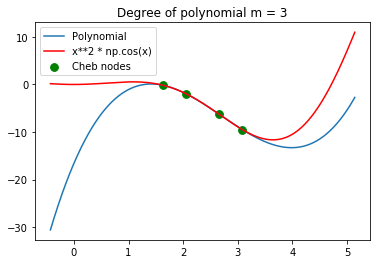

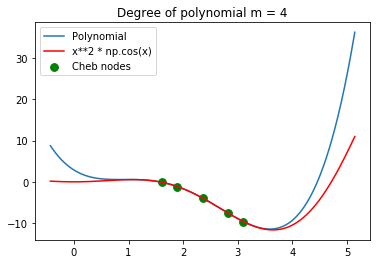

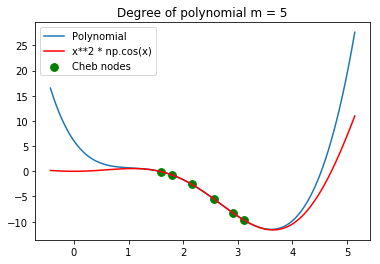

In [26]:
# ... ENTER YOUR CODE HERE ...

def Cheb_Lagr(f, m, func, title='', bounds=[np.pi/2, np.pi], external=True):
    m += 1
    
    X_Nodes = np.zeros(m)
    for i in range(m):
        root = np.cos(np.pi - np.pi * (2 * i + 1) / (2 * m))   # начал именно так, просто чтобы уже были отсортированы корни
        X_Nodes[i] = 0.5*(bounds[-1] + bounds[0]) + 0.5*(bounds[-1] - bounds[0]) * root   # переход от корней на [-1, 1] на наш интервал, 1 член - смещение центра, 2 - растянутое отклонение от него
    
    Y_Nodes = np.array([f(k) for k in X_Nodes])    # как и в прошлой, Y_Nodes понадобятся в полиноме и на графике
    
    def P(X_Nodes, Y_Nodes, x):                 # оставшийся код не отличается от предыдущего
        result = 0
        N = X_Nodes.shape[0]
        for i in range(N):
            l = 1
            for j in range(N):
                if i != j:
                    l *= (x - X_Nodes[j])/(X_Nodes[i] - X_Nodes[j])
            result += Y_Nodes[i] * l
        return result
    
    fig, ax = plt.subplots()
    
    if external:
        X = np.arange(bounds[0] - 2, bounds[1] + 2, 1e-2)      # посмотрим как интервал, так и немного за ним поведение полинома(по умолчанию)
    else:
        X = np.arange(bounds[0], bounds[1], 1e-2)
    
    Y = np.array([P(X_Nodes, Y_Nodes, x) for x in X])
    
    ax.plot(X, Y, label='Polynomial')
    ax.scatter(X_Nodes, Y_Nodes, label='Cheb nodes', c='green', s=60)
    
    trueY = np.array([f(x) for x in X])
    ax.plot(X, trueY, c='red', label=func)
    ax.set(title=title)
    ax.legend()
    plt.show()


for i in range(5):
    Cheb_Lagr(f, i+1, 'x**2 * np.cos(x)', title=f'Degree of polynomial m = {i+1}')

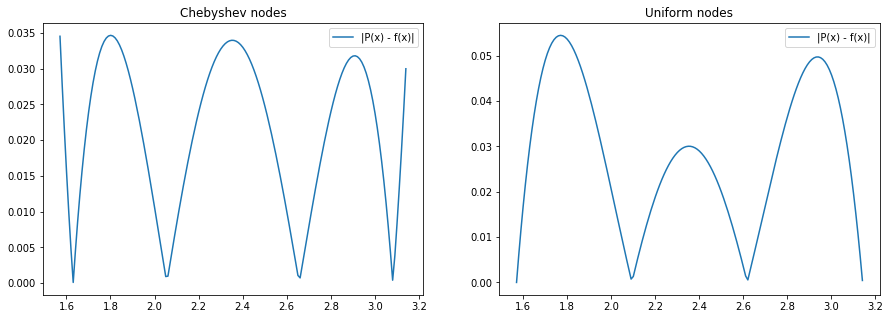

In [27]:
# теперь проверим, что было лучше для m = 3

def QualityComp(f, m, bounds=[np.pi/2, np.pi]):
    m += 1
    step = (bounds[1] - bounds[0])/(m-1)
    
    X_Cheb_Nodes = np.zeros(m)  # сетка для чебышевских
    for i in range(m):
        root = np.cos(np.pi - np.pi * (2 * i + 1) / (2 * m))
        X_Cheb_Nodes[i] = 0.5*(bounds[-1] + bounds[0]) + 0.5*(bounds[-1] - bounds[0]) * root
    Y_Cheb_Nodes = np.array([f(k) for k in X_Cheb_Nodes])
    
    
    X_Nodes = np.arange(bounds[0], bounds[1]+step/2, step)  # равномерная сетка
    Y_Nodes = np.array([f(k) for k in X_Nodes])
    
    def P(X_Nodes, Y_Nodes, x):                 # благодаря такой структуре, код из прошлых функций работает для любой сетки
        result = 0
        N = X_Nodes.shape[0]
        for i in range(N):
            l = 1
            for j in range(N):
                if i != j:
                    l *= (x - X_Nodes[j])/(X_Nodes[i] - X_Nodes[j])
            result += Y_Nodes[i] * l
        return result
    
    fig, ax = plt.subplots(ncols=2, figsize=(15,5))
    
    X = np.arange(bounds[0], bounds[1], 1e-2)
    Y_cheb = np.array([np.abs(f(x) - P(X_Cheb_Nodes, Y_Cheb_Nodes, x)) for x in X]) # разность для узлов чебышева
    Y = np.array([np.abs(f(x) - P(X_Nodes, Y_Nodes, x)) for x in X])           # для равномерной сетки
    
    ax[0].plot(X, Y_cheb, label='|P(x) - f(x)|')
    ax[0].set(title='Chebyshev nodes')
    ax[0].legend()
    
    ax[1].plot(X, Y, label='|P(x) - f(x)|')
    ax[1].set(title='Uniform nodes')
    ax[1].legend()
    
    plt.show()
    
QualityComp(f, 3)

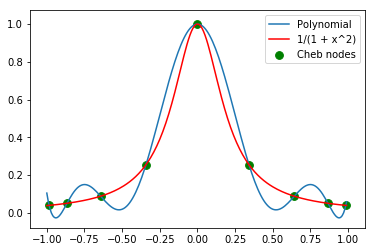

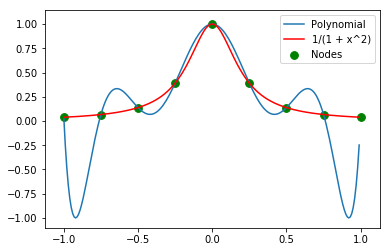

In [28]:
# Заметим, что хоть в данном случае узлы Чебышева дали небольшое, но всё же улучшение
# Проделаем похожее сравнение, например, для более плохой функции:

def bad(x):
    return 1/(1 + 25 * x**2)

Cheb_Lagr(bad, 8, '1/(1 + x^2)', bounds=[-1, 1], external=False)
Lagr_interp(bad, 8, '1/(1 + x^2)', bounds=[-1, 1], external=False)

#для такого случая уже явно видно преимущество узлов Чебышева